In [1]:
# Error in get(name, envir = asNamespace(pkg), inherits = FALSE) : object 'char_to_b64' not found #19
# https://github.com/mkearney/tweetbotornot/issues/19#issuecomment-427173888
devtools::install_github("mkearney/tweetbotornot", ref = "a7c5ae605a0a0547298150ee1f4d3397ff106bf3")

## install remotes pkg if not already
if (!requireNamespace("remotes")) {
install.packages("remotes")
}
## install rtweet
remotes::install_github("mkearney/rtweet")
## install textfeatures
remotes::install_github("mkearney/textfeatures")
## install tweetbotornot
#remotes::install_github("mkearney/tweetbotornot")

Skipping install of 'tweetbotornot' from a github remote, the SHA1 (a7c5ae60) has not changed since last install.
  Use `force = TRUE` to force installation
Skipping install of 'rtweet' from a github remote, the SHA1 (ecf00fd5) has not changed since last install.
  Use `force = TRUE` to force installation
Skipping install of 'textfeatures' from a github remote, the SHA1 (157f774f) has not changed since last install.
  Use `force = TRUE` to force installation


In [2]:
library(devtools)
install_github("marsha5813/botcheck")

Skipping install of 'botcheck' from a github remote, the SHA1 (0ed00820) has not changed since last install.
  Use `force = TRUE` to force installation


In [3]:
## install pkg hrbrthemes if not already
if (!requireNamespace("hrbrthemes")) {
    install.packages("hrbrthemes")
    hrbrthemes::import_roboto_condensed()
}

# How to install GGRAPH package to the latest R (v.3.3.2) - Stack Overflow
# https://stackoverflow.com/questions/42315364/how-to-install-ggraph-package-to-the-latest-r-v-3-3-2

## install pkg udunits2 if not already
if (!requireNamespace("udunits2")) {
    install.packages("udunits2")
} 

## install pkg ggraph if not already
if (!requireNamespace("ggraph")) {
    devtools::install_github('thomasp85/ggforce') 
    devtools::install_github('thomasp85/ggraph')
}

# foreach
if (!requireNamespace("foreach")) {
    install.packages("foreach")
}

Loading required namespace: hrbrthemes
Loading required namespace: udunits2
Loading required namespace: ggraph
Loading required namespace: foreach


In [4]:
# Botometer® by OSoMe
# https://botometer.iuni.iu.edu/#!/api
# R client library - marsha5813/botcheck
# https://github.com/marsha5813/Botcheck
library(botcheck)

# Load dependencies
library(RJSONIO)
library(data.table)
library(dplyr)
library(foreach)
library(ggplot2)
library(ggraph)
library(hrbrthemes)
library(httpuv)
library(httr)
library(igraph)
library(lubridate)
library(rtweet)
library(stringr)
library(textfeatures)
library(tidytext)
library(tidyverse)
library(tweetbotornot)
library(webshot)
library(xml2)

# file containing Twitter and Mashape credentials
source(file="credentials.r")

myapp = oauth_app("twitter", key=consumer_key, secret=consumer_secret)
sig = sign_oauth1.0(myapp, token=access_token, token_secret=access_secret)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘lubridate’

The following object is masked from ‘package:igraph’:

    %--%

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ readr   1.3.1
✔ tidyr   0.8.2     ✔ purr

In [5]:
# get Twitter Data and save 
username <- c("Donaldsdemise")
name <- username
filename <- paste(name, ".csv", sep="")
modified_filename <- paste(name, "_modified.csv", sep="")
rda_filename <- paste(name, ".rda", sep="")
name <- get_timeline(name, n=3200)
pulled_on <- Sys.time()
write_as_csv(name, file_name= filename, prepend_ids = TRUE, na = "", 
             fileEncoding = "UTF-8")
save(name, file=rda_filename)

In [36]:
ws_URL <- paste('https://mobile.twitter.com/', username, '/', sep="")
#ws_filename <- paste(username, '-viewport.png', sep="")
ws_filename <- paste(username, '.png', sep="")

#webshot(ws_URL, ws_filename, cliprect = "viewport", delay = 6.0)
webshot(ws_URL, ws_filename, delay = 10.0)

PhantomJS has crashed. Please read the bug reporting guide at
<http://phantomjs.org/bug-reporting.html> and file a bug report.


ERROR: Error in webshot(ws_URL, ws_filename, delay = 10): webshot.js returned failure value: -8


In [30]:
ws_URL
ws_filename

[1] "https://twitter.com/Donaldsdemise"

[1] "Donaldsdemise.png"

In [8]:
now <- lubridate::with_tz(Sys.time(), "UTC")
pulled_on <- (lubridate::with_tz(pulled_on, "UTC"))
days_elapsed <- pulled_on - (lubridate::with_tz(name$account_created_at[1], "UTC"))
#print(days_elapsed)

acct_created <- lubridate::with_tz(name$account_created_at[1], "UTC")
days_elapsed <- interval(acct_created, pulled_on)
days_elapsed <- (days_elapsed/ddays(1))


dd = data.frame(Dates = (date(name$created_at)))
require(dplyr)
min_date <- with(dd, min(Dates))
#min_date

cat ("Analysis of @", name$screen_name[1], ", aka '", name$name[1], "', User ID: ", 
     name$user_id[1], "\n\n", sep="")

cat ("Location:", name$location[1], "\n", sep=" ")
cat ("Description:", name$description[1], "\n", sep=" ")
cat ("URL:", name$url[1], "\n\n", sep=" ")

cat ("User since: ", (format(as.Date(name$account_created_at[1]), "%A")), sep="")
cat (", ", (format(as.Date(name$account_created_at[1]), "%m")), sep="")
cat ("/", (format(as.Date(name$account_created_at[1]), "%d")), sep="")
cat ("/", (format(as.Date(name$account_created_at[1]), "%Y")), "\n", sep="")
     
cat ("Data pulled on: ", (format(as.Date(pulled_on), "%A")), sep="")
cat (", ", (format(as.Date(pulled_on), "%m")), sep="")
cat ("/", (format(as.Date(pulled_on), "%d")), sep="")
cat ("/", (format(as.Date(pulled_on), "%Y")), "\n", sep="")

total_tweets <- name$statuses_count[1]
tweets_per_day <- total_tweets / days_elapsed

cat ("Total tweets: ", total_tweets, " in ", days_elapsed, " days, for an average of ", 
     tweets_per_day, " tweets per day\n\n", sep="")

total_followers_count <- name$followers_count[1]
total_friends_count <- name$friends_count[1]

cat ("Followers:", total_followers_count, "\n", sep=" ")
cat ("Friends:", total_friends_count, "\n\n", sep=" ")

Analysis of @Donaldsdemise, aka 'donaldsdemise', User ID: 555374751

Location:  
Description: #Antitrump #AntiNazi defending America from the fascists 
URL: NA 

User since: Monday, 04/16/2012
Data pulled on: Monday, 02/11/2019
Total tweets: 4915 in 2492.218 days, for an average of 1.972139 tweets per day

Followers: 449 
Friends: 1949 




realDonaldTrump  DonaldJTrumpJr        SebGorka     seanhannity  SenCoryGardner 
            182              52              26              23              23 
     RepKenBuck     IvankaTrump     SteveKingIA  SecretaryZinke              VP 
             21              20              20              17              17 

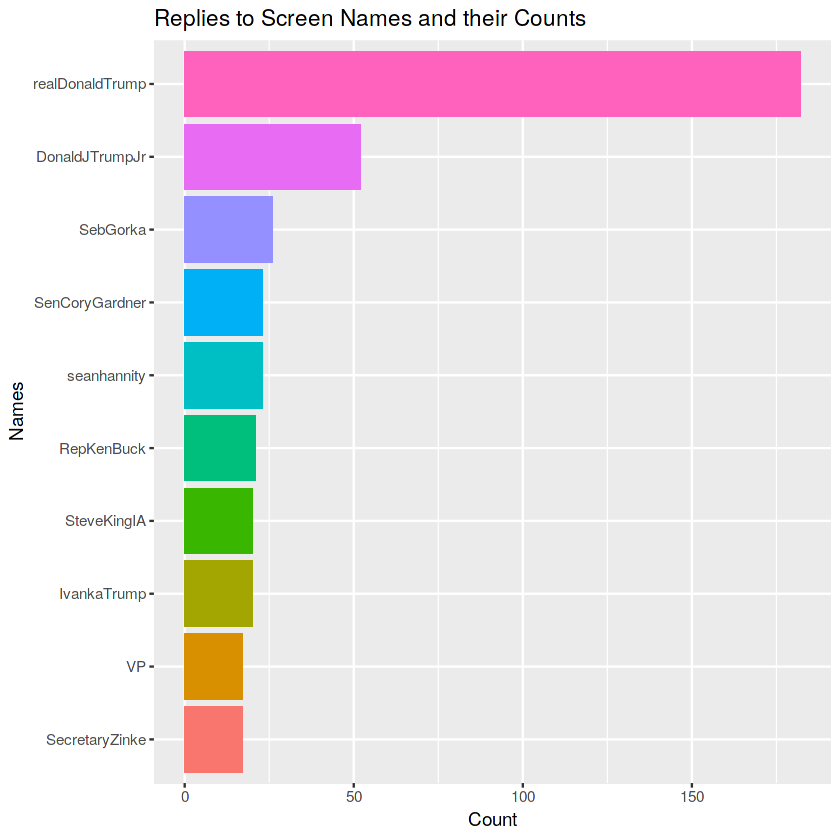

In [9]:
# replies to, using ggplot
replies_to <- table(name$reply_to_screen_name)
replies_to <- replies_to[order(-replies_to)]
top_ten_replies_to <- head(replies_to, 10)
top_ten_replies_to
top_ten_replies_to <- top_ten_replies_to[order(top_ten_replies_to)]

ggplot(as.data.frame(top_ten_replies_to), aes(x=Var1, y=Freq, fill = Var1)) +
  geom_bar(stat = 'identity') +
  xlab('Names') +
  ylab(paste('Count')) +
  ggtitle(paste('Replies to Screen Names and their Counts')) +
  theme(legend.position="none") +
  coord_flip()


    Amy_Siskind         ALT_DOJ     olgaNYC1211    SethAbramson       ALT_uscis 
             60              45              45              45              43 
   krassenstein          funder       mikefarb1 4everNeverTrump         RVAwonk 
             43              40              34              22              22 

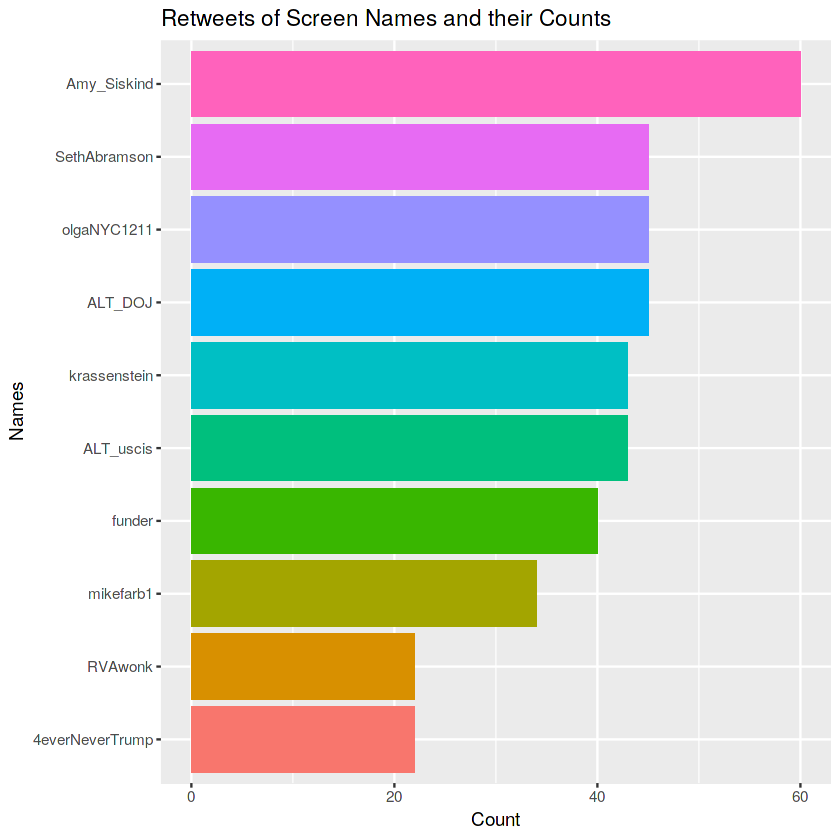

In [10]:
# retweets, using ggplot
retweets <- table(name$retweet_screen_name)
retweets <- retweets[order(-retweets)]
top_ten_retweets <- head(retweets, 10)
top_ten_retweets
top_ten_retweets <- top_ten_retweets[order(top_ten_retweets)]

ggplot(as.data.frame(top_ten_retweets), aes(x=Var1, y=Freq, fill = Var1)) +
  geom_bar(stat = 'identity') +
  xlab('Names') +
  ylab(paste('Count')) +
  ggtitle(paste('Retweets of Screen Names and their Counts')) +
  theme(legend.position="none") +
  coord_flip()

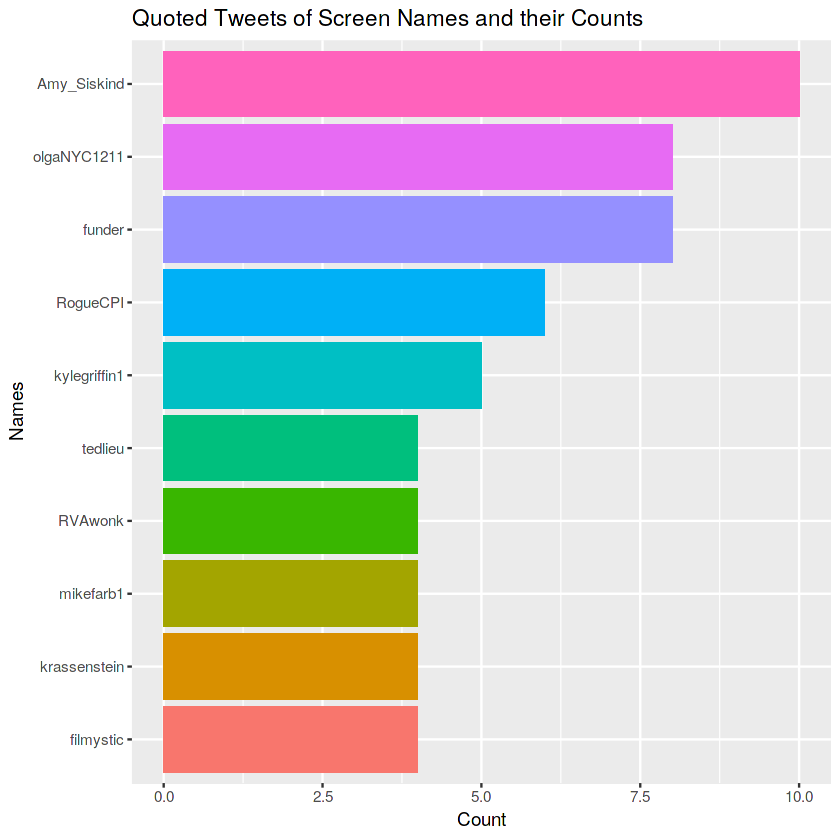

In [11]:
# quoted tweets, using ggplot
quotes <- table(name$quoted_screen_name)
quotes <- quotes[order(-quotes)]
top_ten_quotes <- head(quotes, 10)
if (length(top_ten_quotes)) {
    top_ten_quotes
    top_ten_quotes <- top_ten_quotes[order(top_ten_quotes)]

    ggplot(as.data.frame(top_ten_quotes), aes(x=Var1, y=Freq, fill = Var1)) +
      geom_bar(stat = 'identity') +
      xlab('Names') +
      ylab(paste('Count')) +
      ggtitle(paste('Quoted Tweets of Screen Names and their Counts')) +
      theme(legend.position="none") +
      coord_flip()
    } else { 
    cat('No Quoted Tweets.')
}

Selecting by n


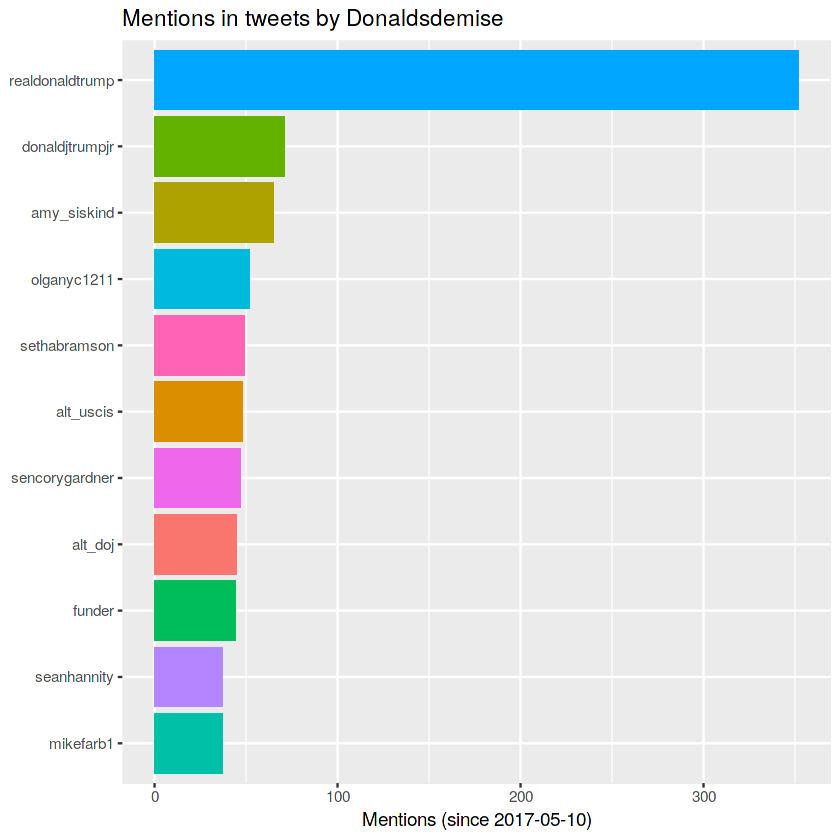

In [12]:
# 21 Recipes for Mining Twitter Data with rtweet
# https://rud.is/books/21-recipes/extracting-tweet-entities.html

# mentions_screen_name
filter(name, !is.na(mentions_screen_name)) %>% 
  select(mentions_screen_name) %>% 
  unnest() %>% 
  mutate(mentions_screen_name = tolower(mentions_screen_name)) %>% 
  count(mentions_screen_name, sort=TRUE) %>% 
  top_n(10) %>%
  ggplot(aes(x = reorder(mentions_screen_name, n), y = n, fill = mentions_screen_name)) +
  geom_bar(stat = 'identity') +
  xlab(NULL) +
  ylab(paste('Mentions (since ',
             min_date,
             ')', sep = '')) +
  ggtitle(paste('Mentions in tweets by', username)) +
  theme(legend.position="none") +
  coord_flip()

mentions_list
realDonaldTrump  DonaldJTrumpJr     SteveKingIA        SebGorka     IvankaTrump 
            248              53              34              31              30 
          POTUS  SenCoryGardner     seanhannity      RepKenBuck      NikkiHaley 
             29              27              26              25              24 

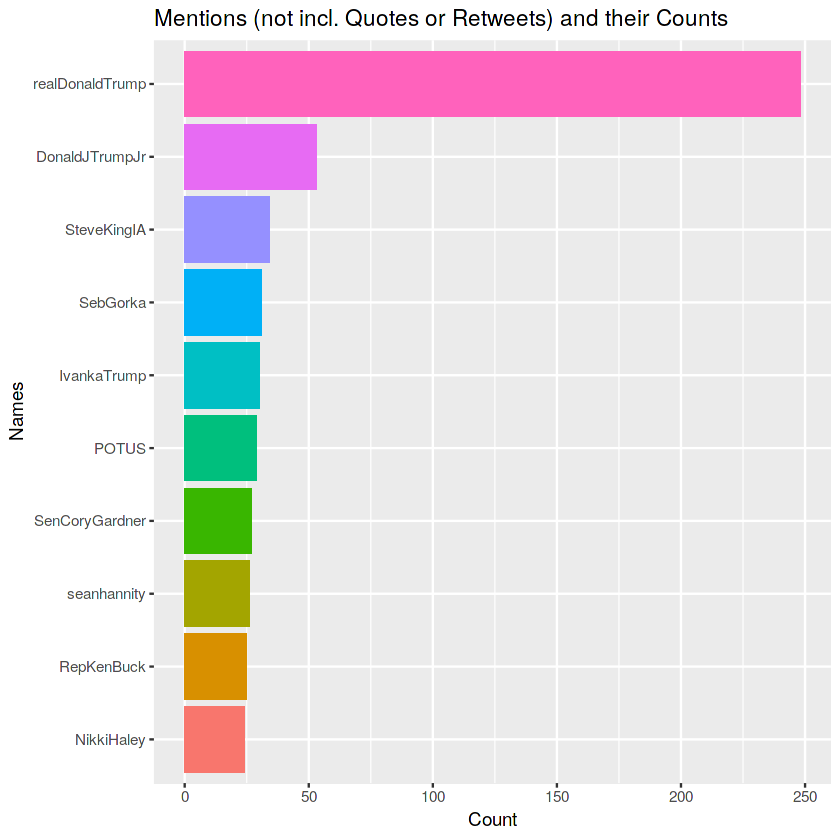

In [13]:
# mentions accts - neither Retweets nor Quotes, using ggplot
mentions <- subset(name, is_quote == 'FALSE')
mentions <- subset(mentions, is_retweet == 'FALSE')
mentions <- subset(mentions, !is.na(mentions_screen_name))
l = nrow(mentions)

# R: Vectors
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/vector.html
mentions_list <- vector(mode = "character")
count = 0

# How to loop through a list in R - Stack Overflow
# https://stackoverflow.com/questions/26297024/
#     how-to-loop-through-a-list-in-r/26298528
for (i in 1:l){
    #print(mentions_only[i])
    for (j in mentions$mentions_screen_name[i]){
        for (k in j){
            for (m in k){
                count = count + 1
                mentions_list[[count]] <- (m)
                }
            }
        }
    }

# Calculate frequency of occurrence in an array using R - Stack Overflow
# https://stackoverflow.com/questions/13841599/
#     calculate-frequency-of-occurrence-in-an-array-using-r
mentions_accts <- sort(table(mentions_list)[table(mentions_list) > 1], 
                       decreasing=TRUE)
top_ten_mentions_accts <- head(mentions_accts, 10)
top_ten_mentions_accts
top_ten_mentions_accts <- top_ten_mentions_accts[order(top_ten_mentions_accts)]

ggplot(as.data.frame(top_ten_mentions_accts), aes(x=mentions_list, y=Freq, fill = mentions_list)) +
  geom_bar(stat = 'identity') +
  xlab('Names') +
  ylab(paste('Count')) +
  ggtitle(paste('Mentions (not incl. Quotes or Retweets) and their Counts')) +
  theme(legend.position="none") +
  coord_flip()

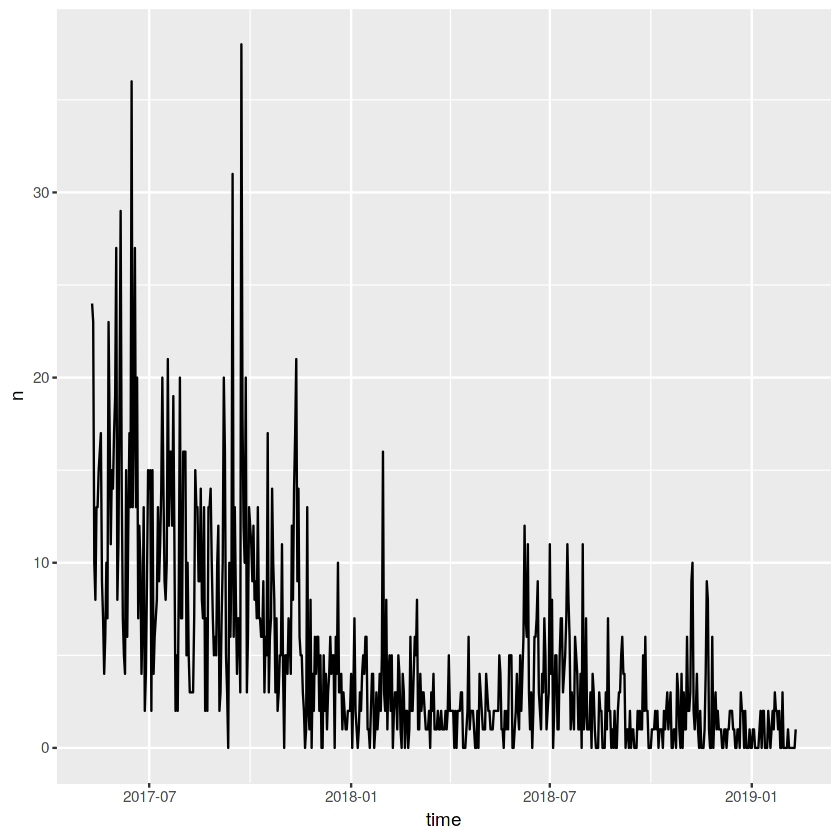

In [14]:
# time series
#ts_data(name)
ts_plot(name, by = "days", trim = 0L, tz = "UTC")

# add some time-related fields
setDT(name)[, Year := format(as.Date(created_at), "%Y")]
setDT(name)[, Month := format(as.Date(created_at), "%m")]
setDT(name)[, Day := format(as.Date(created_at), "%d")]
setDT(name)[, Weekday := format(as.Date(created_at), "%A")]
setDT(name)[, Hour := hour(created_at)]


  0   1   2   3   4   5   6   7  10  11  12  13  14  15  16  17  18  19  20  21 
177 241 345 337 124  41  13   3   6  60 155 205 143 116 100 119 153 141 137 113 
 22  23 
153 169 

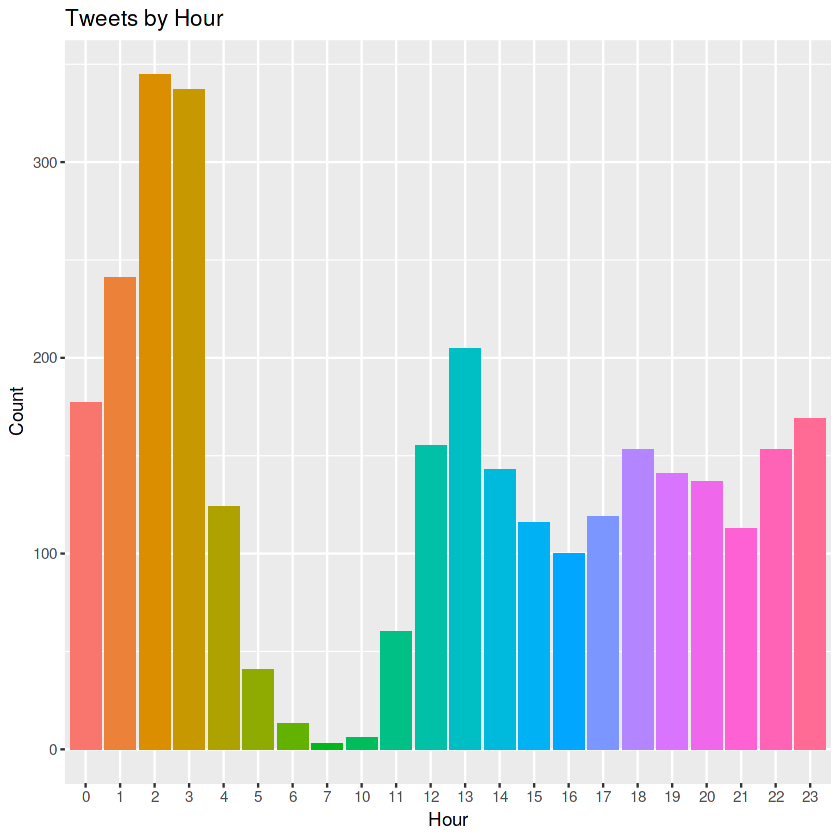

In [15]:
# tweets by hour, using ggplot
tweets_by_hour <- table(name$Hour)
tweets_by_hour

ggplot(as.data.frame(tweets_by_hour), aes(x=Var1, y=Freq, fill = Var1)) +
  geom_bar(stat = 'identity') +
  xlab('Hour') +
  ylab(paste('Count')) +
  ggtitle(paste('Tweets by Hour')) +
  theme(legend.position="none")


   Sunday    Monday   Tuesday Wednesday  Thursday    Friday  Saturday 
      420       384       433       450       482       427       455 

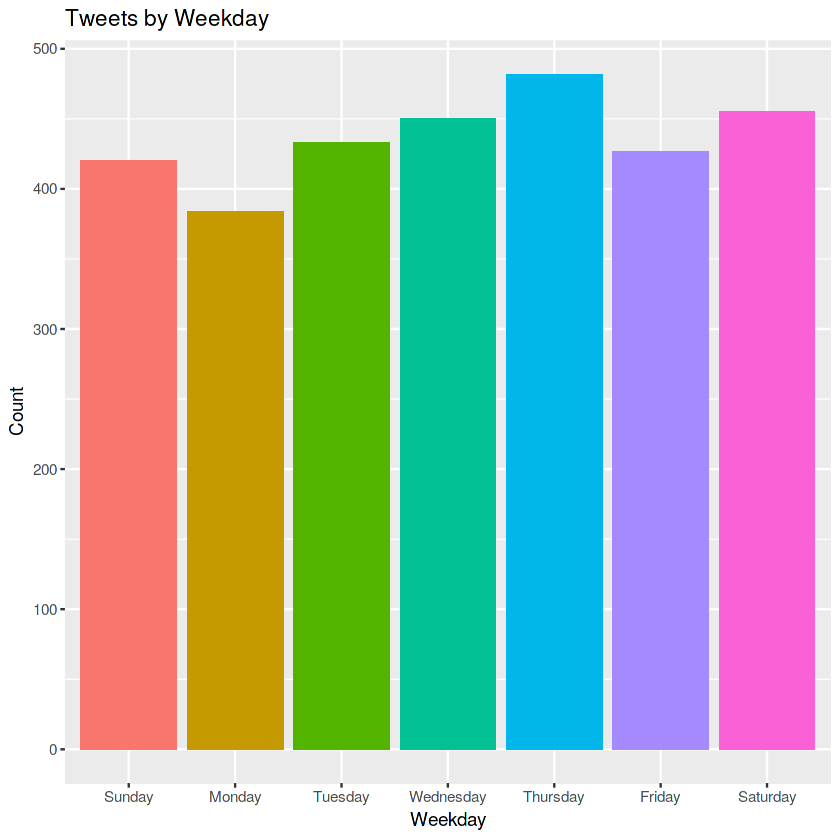

In [16]:
# tweets by weekday, using ggplot
tweets_by_weekday <- table(name$Weekday)
ordered <- c("Sunday", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
tweets_by_weekday <- tweets_by_weekday[ordered]
tweets_by_weekday

ggplot(as.data.frame(tweets_by_weekday), aes(x=Var1, y=Freq, fill = Var1)) +
  geom_bar(stat = 'identity') +
  xlab('Weekday') +
  ylab(paste('Count')) +
  ggtitle(paste('Tweets by Weekday')) +
  theme(legend.position="none")


Twitter for iPhone   Twitter for iPad 
              2897                154 

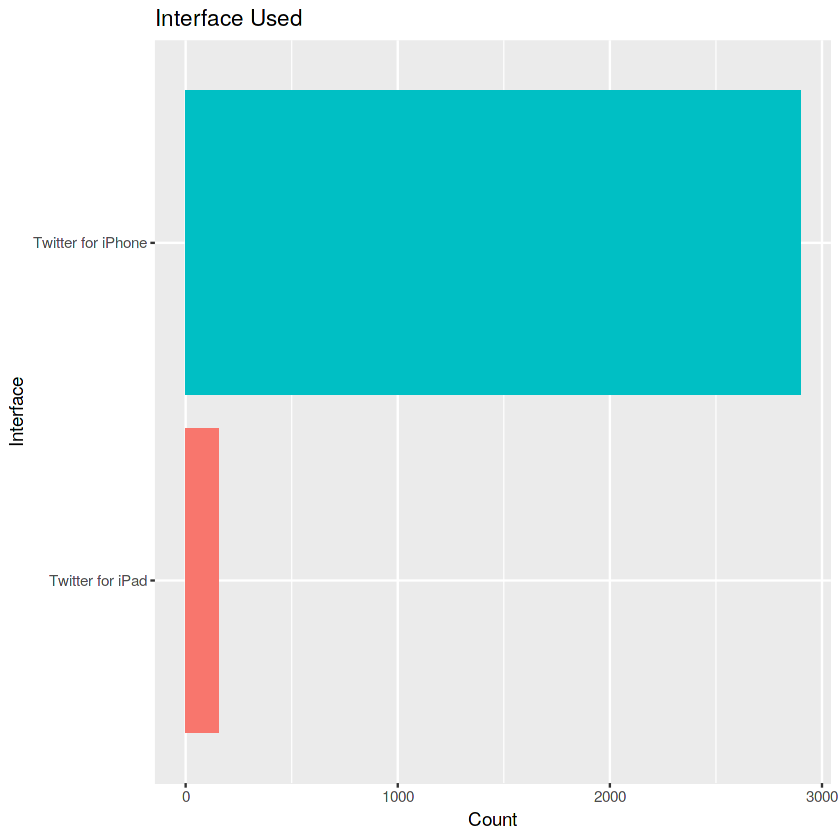

In [17]:
# interface used
interface <- table(name$source)
interface <- interface[order(-interface)]
interface

# kludge in place of debugging
if (length(interface) == 1) {
    # using plot
    my_max = max(interface) + (max(interface) * 0.50)
    plot(x=interface, ylim=c(0,my_max), ylab="Count", xlab="Interface", 
         main="Interface Used")
} else {
    # using ggplot
    interface <- interface[order(interface)]
    ggplot(as.data.frame(interface), aes(x=Var1, y=Freq, fill = Var1)) +
      geom_bar(stat = 'identity') +
      xlab('Interface') +
      ylab(paste('Count')) +
      ggtitle(paste('Interface Used')) +
      theme(legend.position="none") + 
      coord_flip()
}

Selecting by n


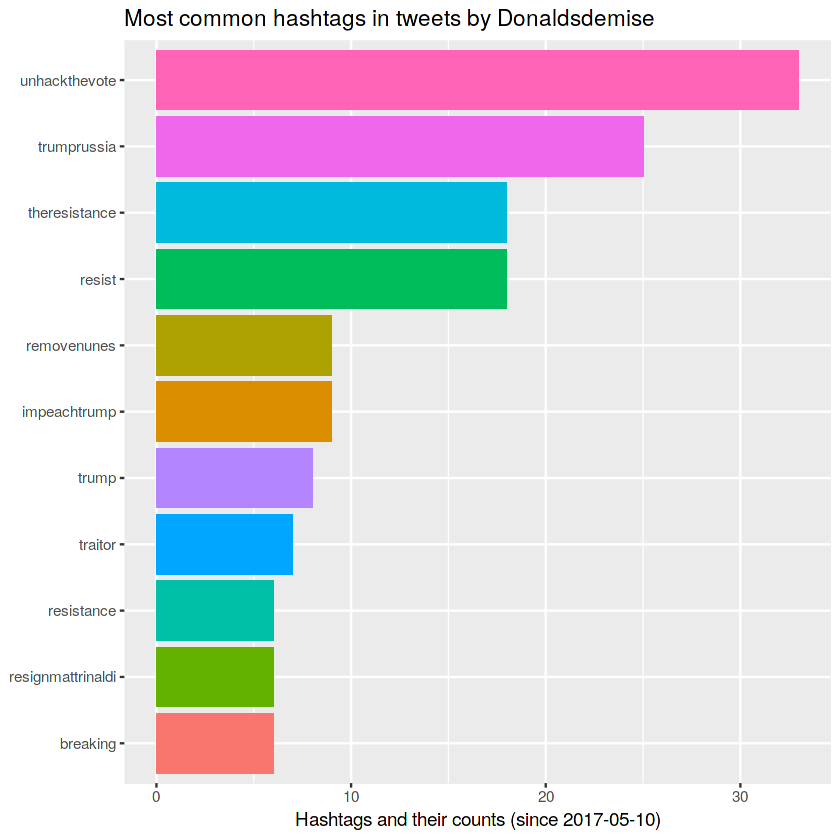

In [18]:
# 21 Recipes for Mining Twitter Data with rtweet
# https://rud.is/books/21-recipes/extracting-tweet-entities.html

# hashtags
select(name[!is.na(hashtags)], hashtags) %>% 
  unnest() %>% 
  mutate(hashtags = tolower(hashtags)) %>% 
  count(hashtags, sort=TRUE) %>% 
  top_n(10) %>%
  ggplot(aes(x = reorder(hashtags, n), y = n, fill = hashtags)) +
  geom_bar(stat = 'identity') +
  xlab(NULL) +
  ylab(paste('Hashtags and their counts (since ',
             min_date,
             ')', sep = '')) +
  ggtitle(paste('Most common hashtags in tweets by', username)) +
  theme(legend.position="none") +
  coord_flip()

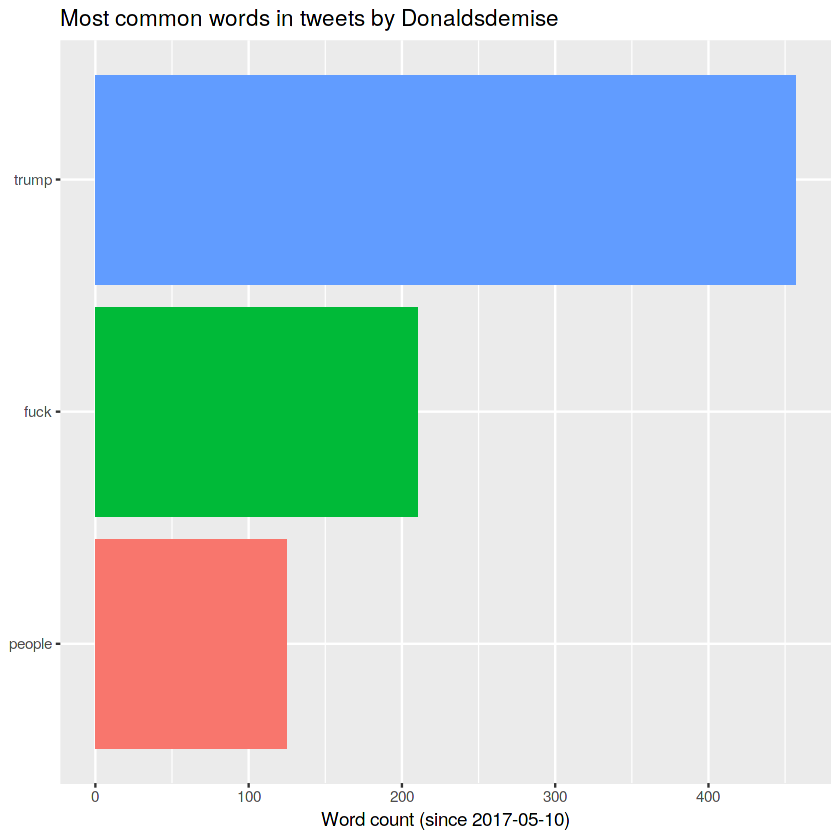

In [19]:
# Adapted from:
# Mining Twitter data with R, TidyText, and TAGS
# https://pushpullfork.com/mining-twitter-data-tidy-text-tags/

minimum_occurrences <- 5 # minimum number of occurrences to include in output

#tweets <- name %>%
#  mutate(date = mdy(paste(substring(created_at, 5, 10), substring(created_at, 27 ,30))))

tweets <- name

reg_words <- "([^A-Za-z_\\d#@']|'(?![A-Za-z_\\d#@]))"
tidy_tweets <- tweets %>%
  filter(!str_detect(text, "^RT")) %>%
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|http://[A-Za-z\\d]+|&amp;|&lt;|&gt;|RT|https", "")) %>%
  unnest_tokens(word, text, token = "regex", pattern = reg_words, collapse = FALSE) %>%
  filter(!word %in% stop_words$word,
         str_detect(word, "[a-z]"))

# most common words
silent <- tidy_tweets %>%
  count(word, sort=TRUE) %>%
  filter(n >= 100) %>%
  mutate(word = reorder(word, n))

# omit hashtags and handles
silent <- tidy_tweets %>%
  count(word, sort=TRUE) %>%
  filter(substr(word, 1, 1) != '#', # omit hashtags
         substr(word, 1, 1) != '@') %>% # omit Twitter handles
  mutate(word = reorder(word, n))

# make this count into a new data frame
word_count <- tidy_tweets %>%
  count(word, sort=TRUE) %>%
  filter(substr(word, 1, 1) != '#', # omit hashtags
         substr(word, 1, 1) != '@') %>% # omit Twitter handles
  mutate(word = reorder(word, n))

my_max = max(word_count$n) * 0.25

# visualize it with ggplot2
tidy_tweets %>%
  count(word, sort=TRUE) %>%
  filter(substr(word, 1, 1) != '#', # omit hashtags
         substr(word, 1, 1) != '@', # omit Twitter handles
         n > my_max) %>% # only most common words
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = word)) +
  geom_bar(stat = 'identity') +
  xlab(NULL) +
  ylab(paste('Word count (since ',
             min_date,
             ')', sep = '')) +
  ggtitle(paste('Most common words in tweets by', username)) +
  theme(legend.position="none") +
  coord_flip()

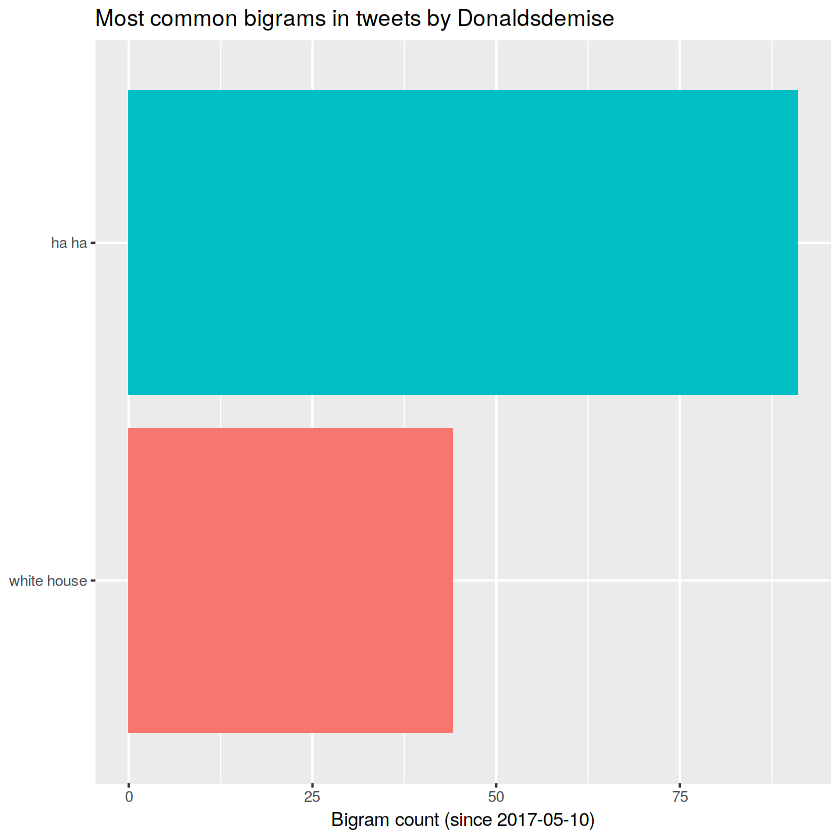

In [20]:
# most common bigrams
tidy_bigrams <- tweets %>%
  filter(!str_detect(text, "^RT")) %>%
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|http://[A-Za-z\\d]+|&amp;|&lt;|&gt;|RT|https", "")) %>%
  unnest_tokens(word, text, token = "regex", pattern = reg_words, collapse = FALSE) %>%
  mutate(next_word = lead(word)) %>%
  filter(!word %in% stop_words$word, # remove stop words
         !next_word %in% stop_words$word, # remove stop words
         substr(word, 1, 1) != '@', # remove user handles to protect privacy
         substr(next_word, 1, 1) != '@', # remove user handles to protect privacy
         substr(word, 1, 1) != '#', # remove hashtags
         substr(next_word, 1, 1) != '#',
         str_detect(word, "[a-z]"), # remove words containing ony numbers or symbols
         str_detect(next_word, "[a-z]")) %>% # remove words containing ony numbers or symbols
  filter(status_id == lead(status_id)) %>% # needed to ensure bigrams to cross from one tweet into the next
  unite(bigram, word, next_word, sep = ' ') %>%
  select(bigram, screen_name, created_at, status_id, followers_count, friends_count, location)

# count and sort the bigrams
bigram_count <- tidy_bigrams %>%
  count(bigram, sort=TRUE) %>%
  mutate(bigram = reorder(bigram, n))

my_max = max(bigram_count$n) / 3

# ggplot
tidy_bigrams %>%
  count(bigram, sort=TRUE) %>%
  filter(n >= my_max) %>%
  mutate(bigram = reorder(bigram, n)) %>%
  ggplot(aes(bigram, n, fill = bigram)) +
  geom_bar(stat = 'identity') +
  xlab(NULL) +
  ylab(paste('Bigram count (since ',
             min_date,
             ')', sep = '')) +
  ggtitle(paste('Most common bigrams in tweets by', username)) +
  theme(legend.position="none") +
  coord_flip()

In [21]:
# which articles and which domains appear the most often
reg <- "([^A-Za-z_\\d#@:/']|'(?![A-Za-z_\\d#@:/]))"
urls_temp <- tweets %>%
  unnest_tokens(word, text, token = "regex", pattern = reg, to_lower = FALSE, collapse = FALSE) %>%
  mutate(word = str_replace_all(word, "https|//t|http|&amp;|&lt;|&gt;", ""),
         word = str_replace_all(word, "co/", "https://t.co/")) %>%
  select(word) %>%
  filter(grepl('https://t.co/', word, fixed = TRUE)) %>%
  count(word, sort=TRUE) %>%
  mutate(word = reorder(word, n))

if (max(urls_temp$n) < minimum_occurrences){
    minimum_occurrences = max(urls_temp$n)
}
    
# unshorten URLs
urls_common <- urls_temp %>%
  filter(n >= minimum_occurrences) %>%
  mutate(source_url = as.character(word)) %>%
  select(source_url, count = n)

url <- t(sapply(urls_common$source_url, GET)) %>%
  as_tibble() %>%
  select(url, status_code)

url_list <- cbind(urls_common, unnest(url)) %>%
  as_tibble() %>%
  select(url, count, status_code) %>%
  filter(status_code != 404,
         url != 'https://t.co/',
         !grepl('https://twitter.com/', url))

# extract domains from URLs
extract_domain <- function(url) {
  return(gsub('www.', '', unlist(strsplit(unlist(strsplit(as.character(url), '//'))[2], '/'))[1]))
}

# count the frequency of a domain's occurrence in the most frequent URL list
domain_list <- url_list %>%
  mutate(domain = mapply(extract_domain, url)) %>%
  group_by(domain) %>%
  summarize(domain_count = sum(count)) %>%
  arrange(desc(domain_count))

domain_list

domain,domain_count
jasoncrowforcongress.com,2
mediamatters.org,2


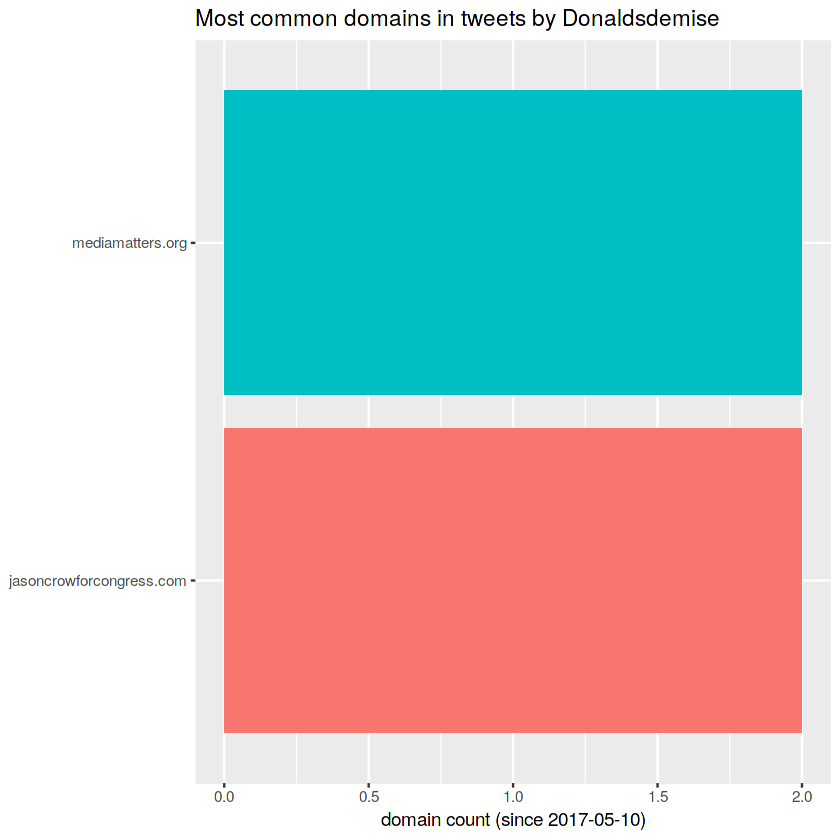

In [22]:
# plot
domain_list %>%
  mutate(domain = reorder(domain, domain_count)) %>%
  ggplot(aes(domain, domain_count, fill = domain)) +
  geom_bar(stat = 'identity') +
  xlab(NULL) +
  ylab(paste('domain count (since ',
             min_date,
             ')', sep = '')) +
  ggtitle(paste('Most common domains in tweets by', username)) +
  theme(legend.position="none") +
  coord_flip()

Selecting by n


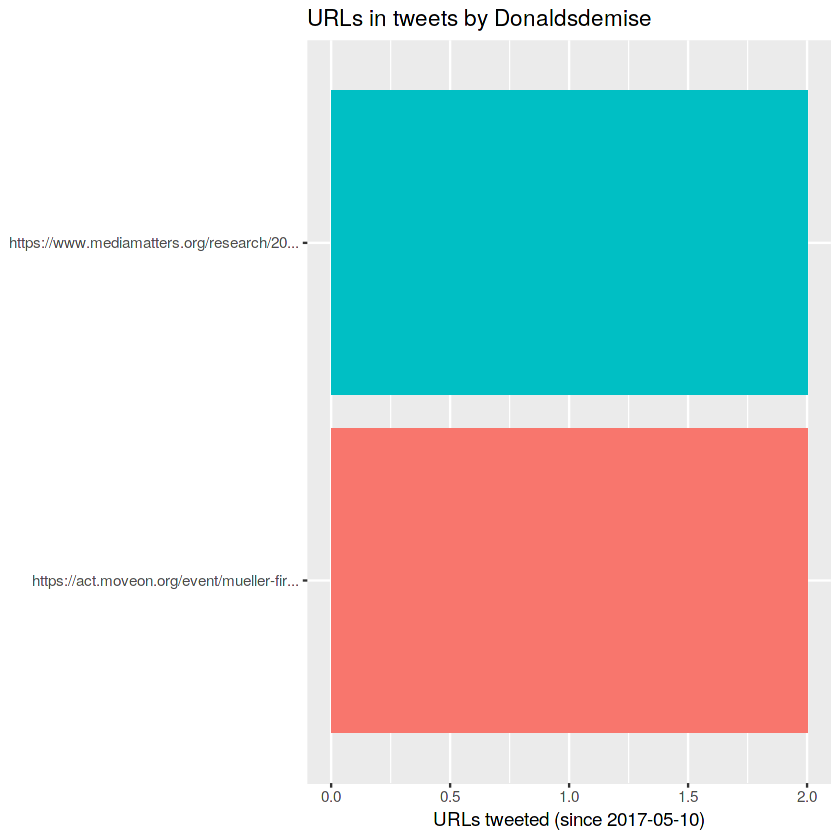

In [23]:
# 21 Recipes for Mining Twitter Data with rtweet
# https://rud.is/books/21-recipes/extracting-tweet-entities.html

# urls_expanded_url
select(name[!is.na(urls_expanded_url)], urls_expanded_url) %>% 
  filter(!str_detect(as.character(urls_expanded_url), 'twitter.com')) %>%
  unnest() %>% 
  mutate(urls_expanded_url = tolower(urls_expanded_url)) %>% 
  count(urls_expanded_url, sort=TRUE) %>% 
  filter(n > 1) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(paste(substr(urls_expanded_url, 1, 40),'...',sep=""), n), y = n, fill = urls_expanded_url)) +
  geom_bar(stat = 'identity') +
  xlab(NULL) +
  ylab(paste('URLs tweeted (since ',
             min_date,
             ')', sep = '')) +
  ggtitle(paste('URLs in tweets by', username)) +
  theme(legend.position="none") +
  coord_flip()

IGRAPH 7bda584 DN-- 955 2412 -- 
+ attr: name (v/c)


Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

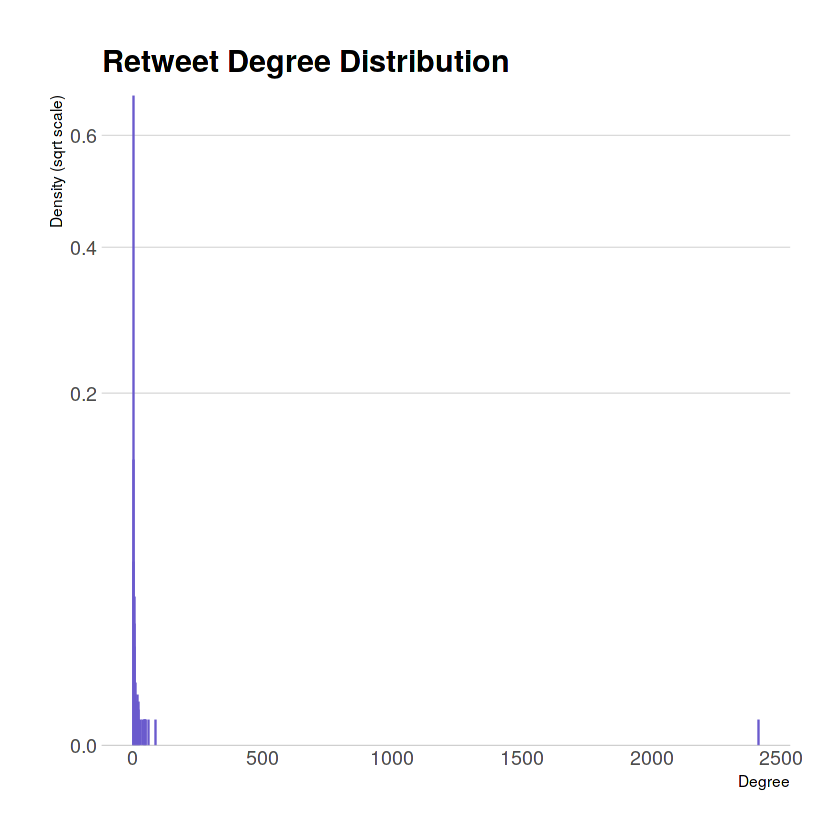

In [24]:
# 21 Recipes for Mining Twitter Data with rtweet
# https://rud.is/books/21-recipes/creating-a-graph-of-retweet-relationships.html

filter(name, retweet_count > 0) %>% 
  select(screen_name, mentions_screen_name) %>%
  unnest(mentions_screen_name) %>% 
  filter(!is.na(mentions_screen_name)) %>% 
  graph_from_data_frame() -> rt_g

summary(rt_g)

ggplot(data_frame(y=degree_distribution(rt_g), x=1:length(y))) +
  geom_segment(aes(x, y, xend=x, yend=0), color="slateblue") +
  scale_y_continuous(expand=c(0,0), trans="sqrt") +
  labs(x="Degree", y="Density (sqrt scale)", title="Retweet Degree Distribution") +
  theme_ipsum_rc(grid="Y", axis="x")

In [25]:
# Followers, Friends, and the Intersection thereof
followers <- rtweet::get_followers(username, n = 3000, retryonratelimit = TRUE)
friends <- rtweet::get_friends(username, n = 3000, retryonratelimit = TRUE)
rda_filename_followers <- paste(username, "_followers.rda", sep="")
save(followers, file=rda_filename_followers)
rda_filename_friends <- paste(username, "_friends.rda", sep="")
save(friends, file=rda_filename_friends)

followed_friends <- intersect(followers$user_id, friends$user_id)
best_friends <- lookup_users(followed_friends)
rda_filename_best_friends <- paste(username, "_best_friends.rda", sep="")
save(best_friends, file=rda_filename_best_friends)

common = nrow(best_friends)
cat ("Best friends (friends as well as followers):", common, "\n\n", sep=" ")

for(i in 1:common){
    cat ("@", best_friends$screen_name[i], ", aka '", best_friends$name[i], "', User ID: ", 
         best_friends$user_id[i], "\n\n", sep="")
}

75000 followers!


Best friends (friends as well as followers): 417 

@evesturtevant, aka 'Eve sturtevant', User ID: 1876150548

@JimToomey1, aka 'Jim Toomey', User ID: 344747525

@thesushies, aka 'The Sushies', User ID: 2148985103

@CaseyContrarian, aka 'Casey Rae', User ID: 16083185

@CarlForrest, aka 'Carl Forrest', User ID: 50397179

@fat_man_rocks, aka 'Jerry', User ID: 1106603538

@unity_audio, aka 'Unity Audio', User ID: 955407537398059009

@Keep2020Alive, aka '🌊 Keep2020Alive', User ID: 755808822506041344

@BeSeriousUSA, aka 'BeSeriousUSA', User ID: 806794262004150273

@CrazyDanblue, aka 'Crazy Dan', User ID: 860603649264889857

@sjellis_0220, aka 'Sherri', User ID: 786009340092092416

@EnjoyNature, aka 'Enjoy Nature 🌻+☀️=💛', User ID: 878650598043856899

@EffinghamUSA, aka 'hamberder', User ID: 822229275927605252

@JamesKennedyUK, aka 'James Kennedy', User ID: 1242525277

@DynamiteHack, aka 'Dynamite Hack', User ID: 331785597

@hyperinsomniac, aka 'Borderline Musick', User ID: 2448640374

@LinSmi

In [26]:
# mkearney/tweetbotornot: 🤖 R package for detecting Twitter bots via machine learning
# https://github.com/mkearney/tweetbotornot
botornot(name, fast = TRUE)

↪ Counting features in text...
↪ Sentiment analysis...
↪ Parts of speech...


Warning message in get_dtm(corp):
“dtm has 0 rows. Empty iterator?”

↪ Word dimensions estimated
↪ Normalizing data
✔ Job's done!
↪ Counting features in text...
↪ Sentiment analysis...
↪ Parts of speech...


Warning message in get_dtm(corp):
“dtm has 0 rows. Empty iterator?”

↪ Word dimensions estimated
↪ Normalizing data
✔ Job's done!
↪ Counting features in text...
↪ Sentiment analysis...
↪ Parts of speech...


Warning message in get_dtm(corp):
“dtm has 0 rows. Empty iterator?”

↪ Word dimensions estimated
↪ Normalizing data
✔ Job's done!


screen_name,user_id,prob_bot
Donaldsdemise,555374751,0.9870874


In [27]:
# Botometer® by OSoMe
# https://botometer.iuni.iu.edu/#!/api
botcheck(username)

[1] 0.09286695

In [28]:
BS_URL <- paste('https://botsentinel.com/analyze/embedded?handle=', username, sep="")
BS_filename <- paste(username, '-botsentinel.png', sep="")

webshot(BS_URL, BS_filename, delay = 6.0)

![image](Donaldsdemise-botsentinel.png)